**Rümeysa Nazli - 234329040 - Makine Öğrenmesi Arasınav Ödevi **

# 1. Soru :	Ara sınav ödevinde size atanan veri setine tüm algoritmalar için normalizasyon yöntemlerinden birini  uygulayınız.


Öncelikle veri setini çekelim ve veriyi normalize edelim.


In [1]:
import pandas as pd

# veriyi çekelim
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)

# kullanmayacağımız için 'test' sütununu çıkartalım
dataframe.drop('test', axis=1, inplace=True)

print(dataframe)

     preg  plas  pres  skin  mass   pedi  age  class
0       6   148    72    35  33.6  0.627   50      1
1       1    85    66    29  26.6  0.351   31      0
2       8   183    64     0  23.3  0.672   32      1
3       1    89    66    23  28.1  0.167   21      0
4       0   137    40    35  43.1  2.288   33      1
..    ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48  32.9  0.171   63      0
764     2   122    70    27  36.8  0.340   27      0
765     5   121    72    23  26.2  0.245   30      0
766     1   126    60     0  30.1  0.349   47      1
767     1    93    70    31  30.4  0.315   23      0

[768 rows x 8 columns]


In [5]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler normalizasyonu
scaler = MinMaxScaler()

# DataFrame'deki tüm sütunları normalize edelim
dataframe_normalized = scaler.fit_transform(dataframe)

# Normalize edilmiş veriyi DataFrame'e dönüştürelim
dataframe_normalized = pd.DataFrame(dataframe_normalized, columns=dataframe.columns)

print("Normalize edilmiş veri seti: ")
print(dataframe_normalized)


Normalize edilmiş veri seti: 
         preg      plas      pres      skin      mass      pedi       age  \
0    0.352941  0.743719  0.590164  0.353535  0.500745  0.234415  0.483333   
1    0.058824  0.427136  0.540984  0.292929  0.396423  0.116567  0.166667   
2    0.470588  0.919598  0.524590  0.000000  0.347243  0.253629  0.183333   
3    0.058824  0.447236  0.540984  0.232323  0.418778  0.038002  0.000000   
4    0.000000  0.688442  0.327869  0.353535  0.642325  0.943638  0.200000   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.588235  0.507538  0.622951  0.484848  0.490313  0.039710  0.700000   
764  0.117647  0.613065  0.573770  0.272727  0.548435  0.111870  0.100000   
765  0.294118  0.608040  0.590164  0.232323  0.390462  0.071307  0.150000   
766  0.058824  0.633166  0.491803  0.000000  0.448584  0.115713  0.433333   
767  0.058824  0.467337  0.573770  0.313131  0.453055  0.101196  0.033333   

     class  
0      1.0  
1      0.0  
2     

# 2. soru : Veri setine PCA ve LDA algoritmalarını uygulayarak en yüksek değere sahip iki öz değer için boyut indirgeme işlemini gerçekleştiriniz. PCA ve LDA için hangi özniteliklerin en ayırt edici olduğunu raporlayınız. Alt maddelerde verilen yöntemleri ana veri setine ve PCA uygulanmış transformasyon öznitelik matrisine uygulayınız.





In [9]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Bağımsız değişkenler (X) ve bağımlı değişken (y) olarak ayıralım
X = dataframe.drop('class', axis=1)  # class değişkenini çıkartıp geri kalan değişkenleri bağımlı değiken olarak tanımlıyoruz
y = dataframe['class']

# Veri setini eğitim ve test alt kümelerine bölelim (test %30 olacak şekilde)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veri setini standartdize edelim
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA uygulaması yapalım
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# LDA uygulayın
n_classes = len(y.unique())
n_features = X_train.shape[1]
n_components_lda = min(n_classes - 1, n_features)
lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Sonuçları yazdırın
print("PCA Sonuçları:")
print(X_train_pca)
print("\nLDA Sonuçları:")
print(X_train_lda)


PCA Sonuçları:
[[ 1.91740672 -0.25589455]
 [ 0.08253134  0.38989276]
 [ 0.23456698  2.14267159]
 ...
 [-2.30273804  1.35441893]
 [ 1.9979269  -0.2274159 ]
 [ 1.05544073 -0.60052298]]

LDA Sonuçları:
[[-1.65086737e+00]
 [-2.68949660e-01]
 [ 6.14081180e-01]
 [ 1.16286333e-01]
 [ 4.21267657e-01]
 [-1.00416945e+00]
 [-9.51411714e-02]
 [ 1.37017553e-01]
 [ 1.09676043e+00]
 [-9.34934947e-01]
 [-1.56579055e+00]
 [ 6.95875166e-01]
 [-9.32007189e-01]
 [-5.49221799e-01]
 [ 1.01656906e-01]
 [ 1.73419787e+00]
 [-1.03371756e+00]
 [ 2.42204519e-01]
 [-3.03661650e-01]
 [-4.40749397e-01]
 [-3.87708245e+00]
 [ 1.14894732e+00]
 [-1.27762577e+00]
 [-4.18925954e-01]
 [ 1.32528634e+00]
 [-7.16761112e-01]
 [ 3.66375107e-01]
 [-9.02322224e-01]
 [-1.33701685e+00]
 [ 9.70833386e-01]
 [ 5.02666625e-01]
 [-6.37468415e-01]
 [-1.89109909e+00]
 [-4.56435104e-01]
 [-1.09820469e+00]
 [ 4.74484326e-01]
 [-2.35620677e-01]
 [-1.56330033e+00]
 [ 4.81105649e-02]
 [-4.80363651e-01]
 [-3.38332503e-01]
 [ 1.29600968e+00]
 [ 

In [18]:
# PCA için en ayırt edici öznitelikler
print("PCA için en ayırt edici öznitelikler:")
for i, component in enumerate(pca.components_):
    print(f"Component {i+1}: {', '.join([f'{feat}: {coef:.3f}' for feat, coef in zip(X.columns, component) if feat != 'test'])}")


PCA için en ayırt edici öznitelikler:
Component 1: preg: -0.463, plas: -0.420, pres: -0.435, skin: -0.128, mass: -0.318, pedi: -0.180, age: -0.520
Component 2: preg: -0.362, plas: 0.055, pres: 0.122, skin: 0.596, mass: 0.502, pedi: 0.308, age: -0.386


# PCA Yorumlama

* PCA çıktısı

Her bir bileşen için, her özniteliğin katsayısı gösterilmiştir. Örneğin, "Component 1" için en yüksek katsayıya sahip olan öznitelikler "skin ve pedi"dir. Bu, "Component 1"in en çok "skin ve pedi" özniteliklerine dayandığını gösterir.
Benzer şekilde, "Component 2" için en yüksek katsayıya sahip olan öznitelik "skin"dir.
Bu katsayılar, her bir bileşenin veri setindeki değişkenliği nasıl temsil ettiğini gösterir.

In [17]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Sınıf sayısını belirle
num_classes = len(np.unique(y_train))

# LDA modelini oluştur ve eğit
lda = LinearDiscriminantAnalysis(n_components=min(X_train_scaled.shape[1], num_classes - 1))
X_lda = lda.fit_transform(X_train_scaled, y_train)

# LDA için en ayırt edici öznitelikleri raporla
print("\nLDA için en ayırt edici öznitelikler:")
for i, coef in enumerate(lda.scalings_.T):
    print(f"Discriminant {i+1}: {', '.join([f'{feat}: {c:.3f}' for feat, c in zip(X.columns, coef) if feat != 'test'])}")




LDA için en ayırt edici öznitelikler:
Discriminant 1: preg: 0.135, plas: 0.809, pres: -0.136, skin: -0.046, mass: 0.558, pedi: 0.109, age: 0.329


# LDA yorumlama

* LDA Çıktısı

LDA modelinin ilk diskriminantının özniteliklerinin ağırlıklarını içerir. Her bir öznitelik için belirli bir ağırlık değeri bulunur. Örneğin, "plas" (glukoz seviyesi) özniteliği için ağırlık 0.809'dir. Bu, glukozun bu diskriminant için önemli bir öznitelik olduğunu gösterir. Benzer şekilde, "pres" (diyastolik kan basıncı)  özniteliği için ağırlık -0.136'dır, bu da kan basıncı seviyesinin bu diskriminant için önemli bir öznitelik olduğunu gösterir.

Veri setinde sınıf sayısı özellik sayısından az ise 1 adet diskriminant hesaplanır. LDA modeli, sınıf sayısından bir az kadar diskriminant üretebilir. Bu nedenle, sadece bir diskriminant satırı oluşmuş oldu.

# 3. Soru : Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Eğitim veri seti için Çoklu Doğrusal Regresyon analizi ve Multinominal Lojistik Regresyon analizi yöntemlerini uygulayınız.


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score


# Veri setini eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Çoklu Doğrusal Regresyon modelini oluştur ve eğit
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Multinominal Lojistik Regresyon modelini oluştur ve eğit
mlog_model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=1000)
mlog_model.fit(X_train_scaled, y_train)

# Eğitim veri seti için performans metriklerini hesapla
mlr_train_predictions = mlr_model.predict(X_train)
mlog_train_predictions = mlog_model.predict(X_train)

mlr_train_mse = mean_squared_error(y_train, mlr_train_predictions)
mlog_train_accuracy = accuracy_score(y_train, mlog_train_predictions)

print("Çoklu Doğrusal Regresyon Eğitim Seti Performansı:")
print("MSE:", mlr_train_mse)

print("\nMultinominal Lojistik Regresyon Eğitim Seti Performansı:")
print("Doğruluk Skoru:", mlog_train_accuracy)

# Test veri seti için performans metriklerini hesapla
mlr_test_predictions = mlr_model.predict(X_test)
mlog_predictions = mlog_model.predict(X_test_scaled)

mlr_test_mse = mean_squared_error(y_test, mlr_test_predictions)
mlog_test_accuracy = accuracy_score(y_test, mlog_predictions)

print("\nÇoklu Doğrusal Regresyon Test Seti Performansı:")
print("MSE:", mlr_test_mse)

accuracy = accuracy_score(y_test, mlog_predictions)
print("Multinominal Lojistik Regresyon Test Seti Performansı:")
print("Doğruluk Skoru:", accuracy)


Çoklu Doğrusal Regresyon Eğitim Seti Performansı:
MSE: 0.15472531297894127

Multinominal Lojistik Regresyon Eğitim Seti Performansı:
Doğruluk Skoru: 0.3500931098696462

Çoklu Doğrusal Regresyon Test Seti Performansı:
MSE: 0.17657133273852255
Multinominal Lojistik Regresyon Test Seti Performansı:
Doğruluk Skoru: 0.7316017316017316


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Yorumlama

* Çoklu Doğrusal Regresyon Eğitim Seti Performansı (MSE): Modelin eğitim setindeki ortalama karesel hatası (MSE) yaklaşık 0.1547'dir. Bu, modelin eğitim setindeki tahminlerinin gerçek değerlerden ortalama 0.1547 birim uzaklıkta olduğunu gösterir.Daha düşük bir MSE, daha iyi bir model performansı olduğunu gösterir.

* Multinominal Lojistik Regresyon Eğitim Seti Performansı (Doğruluk Skoru):  Doğruluk skoru 0.3501'dir. Bu, modelin eğitim setindeki doğru sınıflandırma oranının %35.01 olduğunu gösterir.

* Çoklu Doğrusal Regresyon Test Seti Performansı (MSE): Ortalama Kare Hatası (MSE) değeri yaklaşık 0.1766'dır. Bu, modelin test setindeki tahminlerinin gerçek değerlerden ortalama 0.1766 birim uzaklıkta olduğunu gösterir.

* Multinominal Lojistik Regresyon Test Seti Performansı (Doğruluk Skoru): Doğruluk skoru 0.7316'dır. Bu, modelin test setindeki doğru sınıflandırma oranının %73.16 olduğunu gösterir.

# 4. Soru : Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Veri setinize karar ağaç sınıflandırma algoritmasını uygulayarak ağaç yapısını ve kestirim sonuçlarını veriniz. Test verisi için performans metriklerini hesaplayınız.

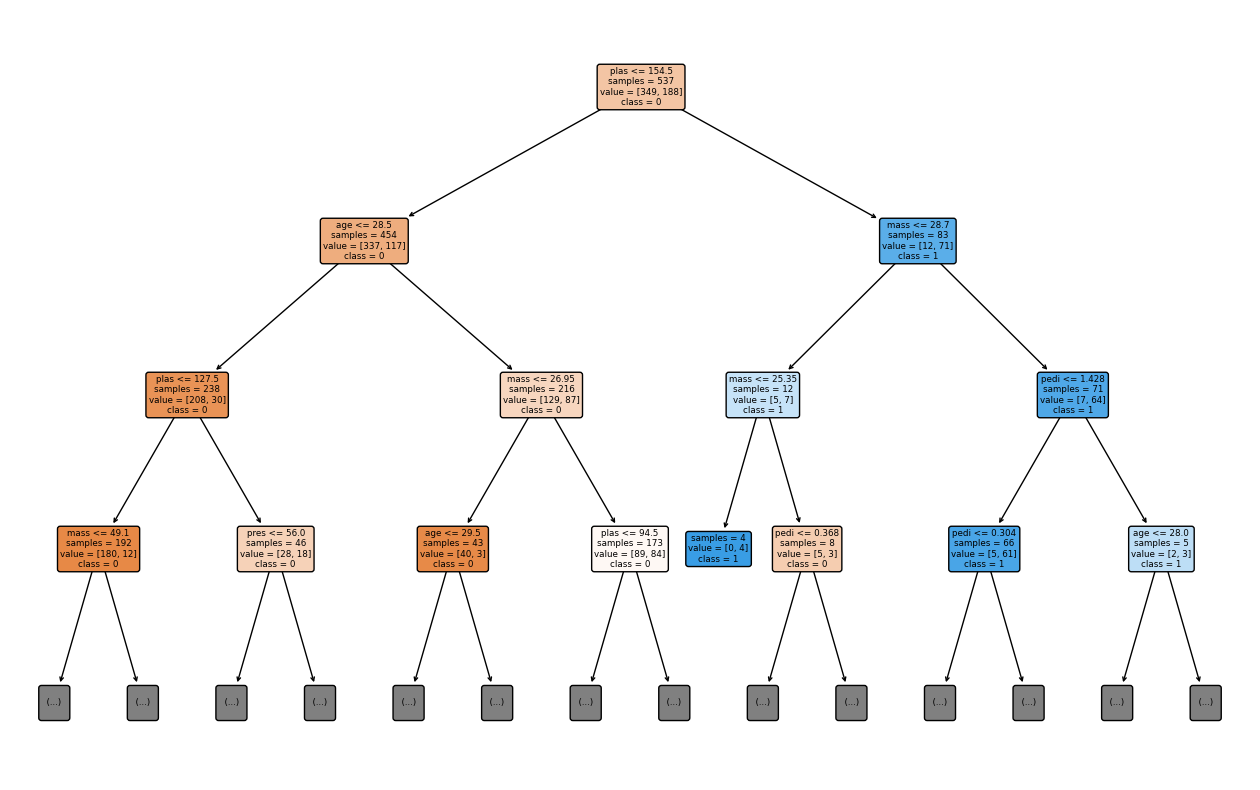


Karar Ağacı Test Seti Performansı:
Doğruluk Skoru: 0.70995670995671
Hassasiyet Skoru: 0.7208410636982067
Duyarlılık Skoru: 0.70995670995671
F1 Score: 0.7138036698535885


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Karar ağacı modelini eğitelim
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# 3 derinlikli karar ağacını çizelim
plt.figure(figsize=(16, 10))
plot_tree(decision_tree_model, filled=True, rounded=True, max_depth=3, class_names=class_names, feature_names=X.columns, impurity=False)
plt.show()

# Test veri seti üzerinde tahmin oluşturalım
y_pred = decision_tree_model.predict(X_test)

# Performans metriklerini hesaplayalım
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdıralım
print("\nKarar Ağacı Test Seti Performansı:")
print("Doğruluk Skoru:", accuracy)
print("Hassasiyet Skoru:", precision)
print("Duyarlılık Skoru:", recall)
print("F1 Score:", f1)

# Yorumlama

* Doğruluk Skoru (Accuracy): 0.7099 olarak hesaplanmıştır. Bu, modelin test setindeki tüm örneklerin yaklaşık %71'ini doğru bir şekilde sınıflandırdığını söyleyebiliriz.

* Hassasiyet Skoru (Precision): 0.7208 olarak hesaplanmıştır. Bu, modelin pozitif olarak tahmin ettiği örneklerin yaklaşık %72'sinin gerçekten pozitif olduğunu göstermektedir.

* Duyarlılık Skoru (Recall): 0.7099 olarak hesaplanmıştır. Bu, gerçek pozitif örneklerin yaklaşık %71'inin model tarafından doğru bir şekilde tanımlandığını göstermektedir.

* F1 Skoru: 0.7138 olarak hesaplanmıştır. Bu, hassasiyet ve duyarlılığın harmonik ortalamasıdır ve modelin sınıflandırma performansını birleştirir. Bu değer, modelin genel performansını daha kapsamlı bir şekilde değerlendirmek için kullanılır.

# Karar ağaçları algoritması için ROC eğrisi çizelim.

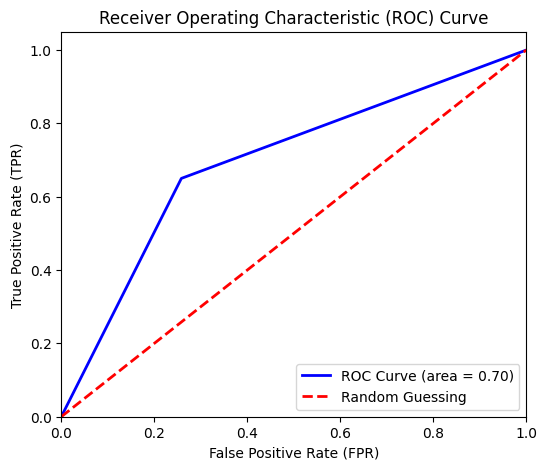

In [46]:
from sklearn.metrics import roc_curve, auc

# Karar ağacı modelimiz üzerinden test veri seti ile tahminleme yapalım
y_pred_proba = decision_tree_model.predict_proba(X_test)

# Tahmin olasılıklarından sadece pozitif sınıfın olasılıklarını alalım
y_pred_proba_positive = y_pred_proba[:, 1]

# ROC eğrisi için fpr (False Positive Rate), tpr (True Positive Rate) ve eşik (threshold) değerlerini hesaplayalım
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_positive)

# ROC eğrisi altında kalan alanı (AUC) hesaplayalım
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizelim
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Yorumlama

* ROC eğrisinin altındaki alan (AUC), modelin sınıflandırma performansının ölçüsüdür. Bu değer ne kadar yüksek olursa, modelin performansı o kadar iyidir. AUC değeri 0 ile 1 arasında değişir ve 1'e ne kadar yakınsa, model o kadar iyidir.Bizim bulduğumuz değer 0.70'tir. Modelimizin performansının orta düzeyde iyi olduğunu söyleyebiliriz.

# 5. Soru : Veri setinizi rastgele olarak %70 eğitim %30 test olacak şekilde ayırınız. Eğitim veri seti için Naive bayes sınıflandırıcısını uygulayınız. Elde ettiğiniz sonucları raporlayınız.  Test verisi için performans metriklerini hesaplayınız.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Naive Bayes sınıflandırıcısını oluşturalım
nb_classifier = GaussianNB()

# Naive Bayes sınıflandırıcısını eğitelim
nb_classifier.fit(X_train, y_train)

# Eğitim seti üzerinde tahminleme yapalım
y_train_pred = nb_classifier.predict(X_train)

# Test seti üzerinde tahminleme yapalım
y_test_pred = nb_classifier.predict(X_test)

# Eğitim seti performans metriklerini hesaplayalım
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

# Test seti performans metriklerini hesaplayalım
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')

# Sonuçları raporlayalım
print("Eğitim Seti Performans Metrikleri:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1_score)

print("\n*-------------------------------------------------------------------------------*")

print("\nTest Seti Performans Metrikleri:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1_score)

Eğitim Seti Performans Metrikleri:
Accuracy: 0.7653631284916201
Precision: 0.7609815935882158
Recall: 0.7653631284916201
F1 Score: 0.7620401281361525

*-------------------------------------------------------------------------------*

Test Seti Performans Metrikleri:
Accuracy: 0.7359307359307359
Precision: 0.7383930245376028
Recall: 0.7359307359307359
F1 Score: 0.7370360589885796


# Eğitim Seti Performans Metrikleri:

* Doğruluk (Accuracy): Eğitim veri setindeki doğru tahminlerin oranıdır. %77'lik bir doğruluk oranı, modelin eğitim verisiyle uyumlu olduğunu göstermektedir.

* Hassasiyet (Precision): Pozitif olarak tahmin edilen örnekler arasında gerçekte pozitif olanların oranını ifade eder. %76'lık bir hassasiyet, modelin gerçekte pozitif olanlar arasında yalnızca %76'sını doğru bir şekilde sınıflandırdığını gösterir diyebiliriz.

* Duyarlılık (Recall): Gerçekte pozitif olan örneklerin ne kadarının doğru bir şekilde tanımlandığını ifade eder. %77'lik bir duyarlılık, modelin gerçek pozitiflerin %77'sini doğru bir şekilde sınıflandırdığını göstermektedir.

* F1 Skoru: Hassasiyet ve duyarlılığın harmonik ortalamasıdır. %76'lık bir F1 skoru, modelin hassasiyet ve duyarlılık arasında iyi bir denge sağladığını gösterir diyebiliriz.

# Test Seti Performans Metrikleri:

* Doğruluk (Accuracy): Eğitim veri setindeki doğru tahminlerin oranıdır.
%73.5'lik bir doğruluk oranı, modelin eğitim verisiyle uyumlu olduğunu gösterir.

* Hassasiyet (Precision): Pozitif olarak tahmin edilen örnekler arasında gerçekte pozitif olanların oranını ifade eder. %73.8'lik bir hassasiyet, modelin gerçekte pozitif olanlar arasında yalnızca %73.8'ini doğru bir şekilde sınıflandırdığını gösterir.

* Duyarlılık (Recall): Gerçekte pozitif olan örneklerin ne kadarının doğru bir şekilde tanımlandığını ifade eder. %73.5'lik bir duyarlılık, modelin gerçek pozitiflerin %73.5'ini doğru bir şekilde sınıflandırdığını gösterir.

* F1 Skoru: Hassasiyet ve duyarlılığın harmonik ortalamasıdır. %73.7'lik bir F1 skoru, modelin hassasiyet ve duyarlılık arasında iyi bir denge sağladığını gösterir.

* Bu sonuçlara göre eğitim ve test verilerinin  benzer performans sergilediğini söyleyebiliriz.


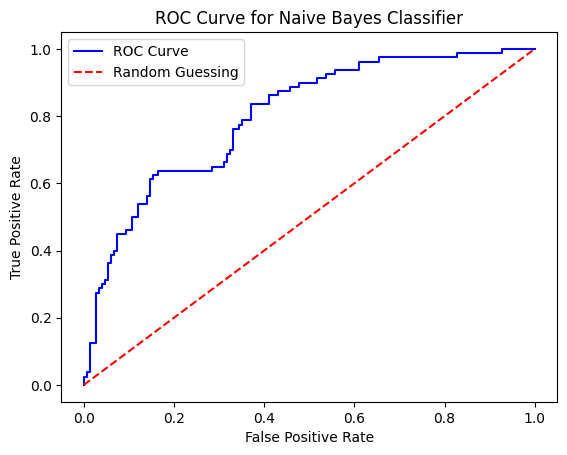


ROC Altında Kalan Alan (AUC): 0.8001655629139073


In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Test veri seti üzerinde tahminler
y_test_pred = nb_classifier.predict_proba(X_test)[:, 1]

# ROC eğrisini hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# ROC eğrisini çizme
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend()
plt.show()

# ROC altında kalan alanı (AUC) hesaplama
auc = roc_auc_score(y_test, y_test_pred)
print("\nROC Altında Kalan Alan (AUC):", auc)


# Yorumlama

* ROC eğrisinin altındaki alan (AUC), modelin sınıflandırma performansının ölçüsüdür. Bu değer ne kadar yüksek olursa, modelin performansı o kadar iyidir. AUC değeri 0 ile 1 arasında değişir ve 1'e ne kadar yakınsa, model o kadar iyidir. Bizim bulduğumuz değer 0.80'dir. Modelimizin performansının iyi düzeyde olduğunu söyleyebiriz.

## **GENEL YORUMLAMA**

* Multinominal Lojistik Regresyon Doğruluk Skoru: 0.7316017316017316 ~ %73


* Karar Ağaçları Doğruluk Skoru: 0.70995670995671 ~ %71
  
  - ROC Altında Kalan Alan (AUC): 0.70 ~ %70
  
* Naive Bayes Accuracy: 0.7359307359307359 ~ %74[bağlantı metni](https://)
  - ROC Altında Kalan Alan (AUC): 0.8001655629139073 ~ %80

Değerlerini karşılaştırdığımızda en iyi performansın naive bayes modeline ait olduğunu söyleyebiliriz. Doğru tahmin etme oranı olan accuracy değerine göre bakarsak Multinominal Lojistik Regresyon modelinin de iyi performans sergilediğini söyleyebiliriz. Yine de sınıflandırma performansı açısından da değerlendirme yaptığımızda Naive Bayes modeli diğerlerine göre daha iyi sonuç vermiştir diyebiliriz.